## Step 1 : Import Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix


## Step 2 : Set Up Dataset Paths

In [2]:
train_dir = "dataset/train"
test_dir = "dataset/test"


## Step 3 : Visualize Sample Images

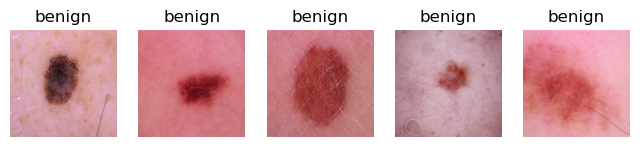

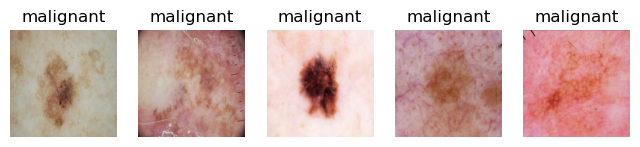

In [3]:
def show_samples(path, label):
    plt.figure(figsize=(8, 4))
    for i, file in enumerate(os.listdir(os.path.join(path, label))[:5]):
        img = cv2.imread(os.path.join(path, label, file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    plt.show()

show_samples(train_dir, "benign")
show_samples(train_dir, "malignant")


## Step 4 : Load Dataset using ImageDataGenerator

In [4]:
train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=32, class_mode='binary', subset='training')
val_data = train_gen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=32, class_mode='binary', subset='validation')
test_data = test_gen.flow_from_directory(test_dir, target_size=(64, 64), batch_size=32, class_mode='binary')


Found 2110 images belonging to 2 classes.
Found 527 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


## Step 5 : Build CNN Model

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

## Step 6 : Train the Model

In [6]:
history = model.fit(train_data, validation_data=val_data, epochs=10)


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 25s 332ms/step - accuracy: 0.5683 - loss: 0.6940 - val_accuracy: 0.7495 - val_loss: 0.5177
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 306ms/step - accuracy: 0.7940 - loss: 0.4571 - val_accuracy: 0.7818 - val_loss: 0.4786
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 305ms/step - accuracy: 0.8017 - loss: 0.4199 - val_accuracy: 0.7287 - val_loss: 0.5030
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 307ms/step - accuracy: 0.8060 - loss: 0.3876 - val_accuracy: 0.7799 - val_loss: 0.4633
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 307ms/step - accuracy: 0.8090 - loss: 0.3791 - val_accuracy: 0.7856 - val_loss: 0.4530
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 307ms/step - accuracy: 0.8217 - loss: 0.3511 - val_accuracy: 0.7211 - val_loss: 0.5441
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 306ms/step - accuracy: 0.8312 - loss: 0.3561 - val_accuracy: 0.7154 - val_loss: 0.5080
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 306ms/step - accuracy: 0.8333 - loss: 0.3337 - val_accu

## Step 7 : Visualize Accuracy and Loss

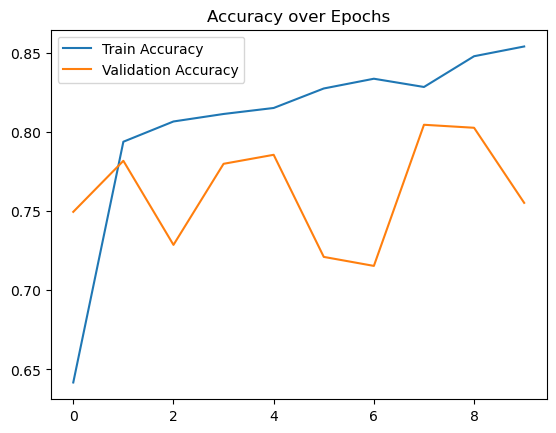

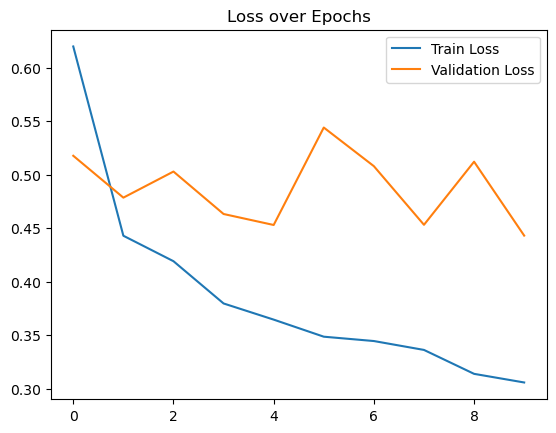

In [7]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()


## Step 8 : Evaluate Model

In [8]:
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy*100:.2f}%")


21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 494ms/step - accuracy: 0.8135 - loss: 0.3483
Test Accuracy: 83.03%


## Step 9 : Confusion Matrix

21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step


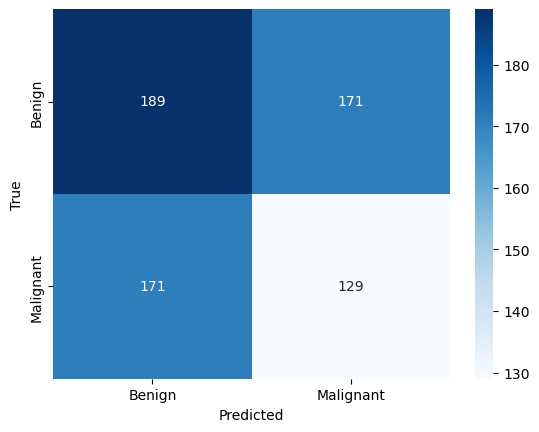

In [9]:
Y_pred = model.predict(test_data)
y_pred = (Y_pred > 0.5).astype(int)

cm = confusion_matrix(test_data.classes, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## Step 10 : Save Model 

In [10]:
model.save("skin_cancer_model.h5")


In [14]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model("skin_cancer_model.h5")

def predict_skin_cancer(image_path, model):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    resized_img = cv2.resize(img, (64, 64)) / 255.0
    input_img = np.expand_dims(resized_img, axis=0)

    # Predict
    prediction = model.predict(input_img)
    label = "Malignant(Cancer)" if prediction[0][0] > 0.5 else "Benign (Non- cancer)"

    # Show image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {label}", fontsize=14)
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


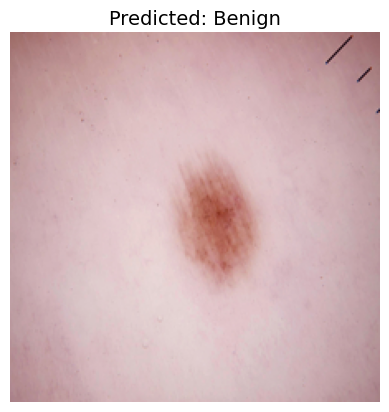

In [12]:
# Test on new image
predict_skin_cancer(r"C:\Users\user\Desktop\Minor project\skin_cancer_dataset\dataset\test\benign\5.jpg", model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


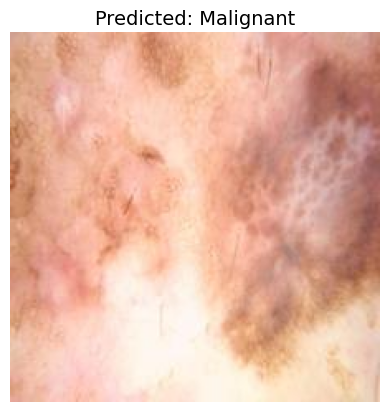

In [13]:
# Test on new image
predict_skin_cancer(r"C:\Users\user\Desktop\Minor project\skin_cancer_dataset\dataset\test\malignant\4.jpg", model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


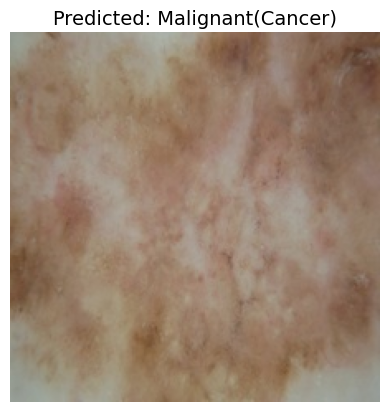

In [15]:
# Test on new image
predict_skin_cancer(r"C:\Users\user\Desktop\Minor project\skin_cancer_dataset\dataset\test\malignant\39.jpg", model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


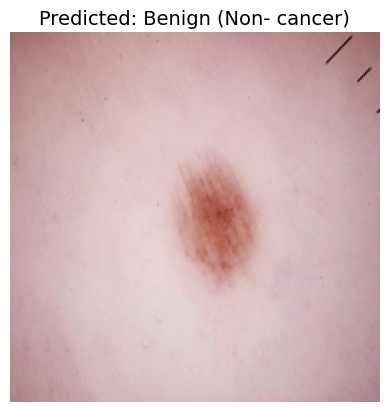

In [16]:
# Test on new image
predict_skin_cancer(r"C:\Users\user\Desktop\Minor project\skin_cancer_dataset\dataset\test\benign\5.jpg", model)